<a href="https://colab.research.google.com/github/drcrajc/iu_infandcasuality/blob/main/infconc_code5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating Educational Program DAG...


<ipython-input-1-a7ed3eb4bc2f>:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


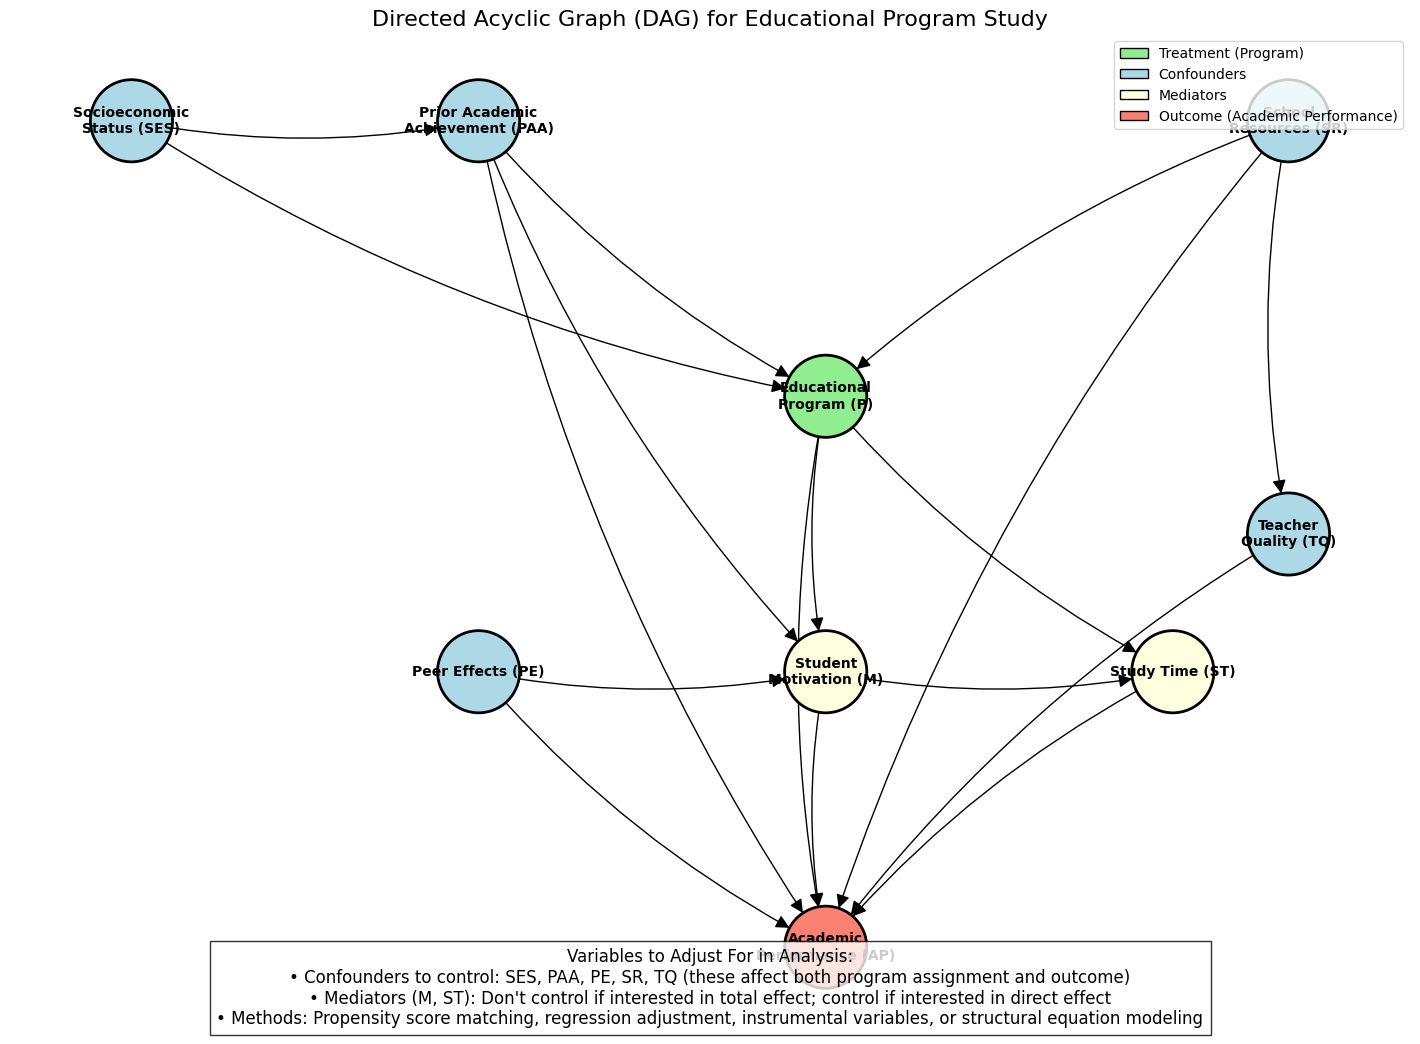


Generating Collider Bias Example...


<Figure size 640x480 with 0 Axes>

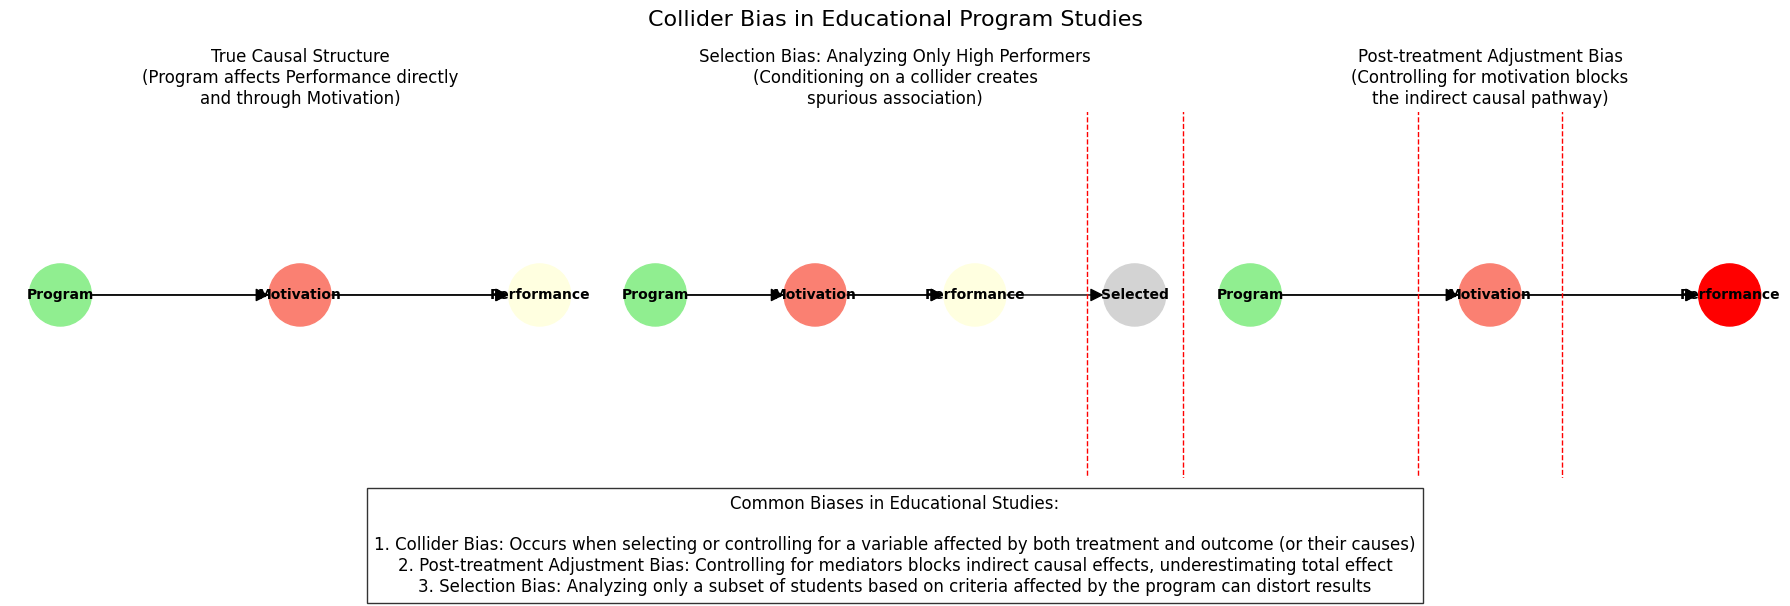


Generating Bias Correction Methods Visualization...


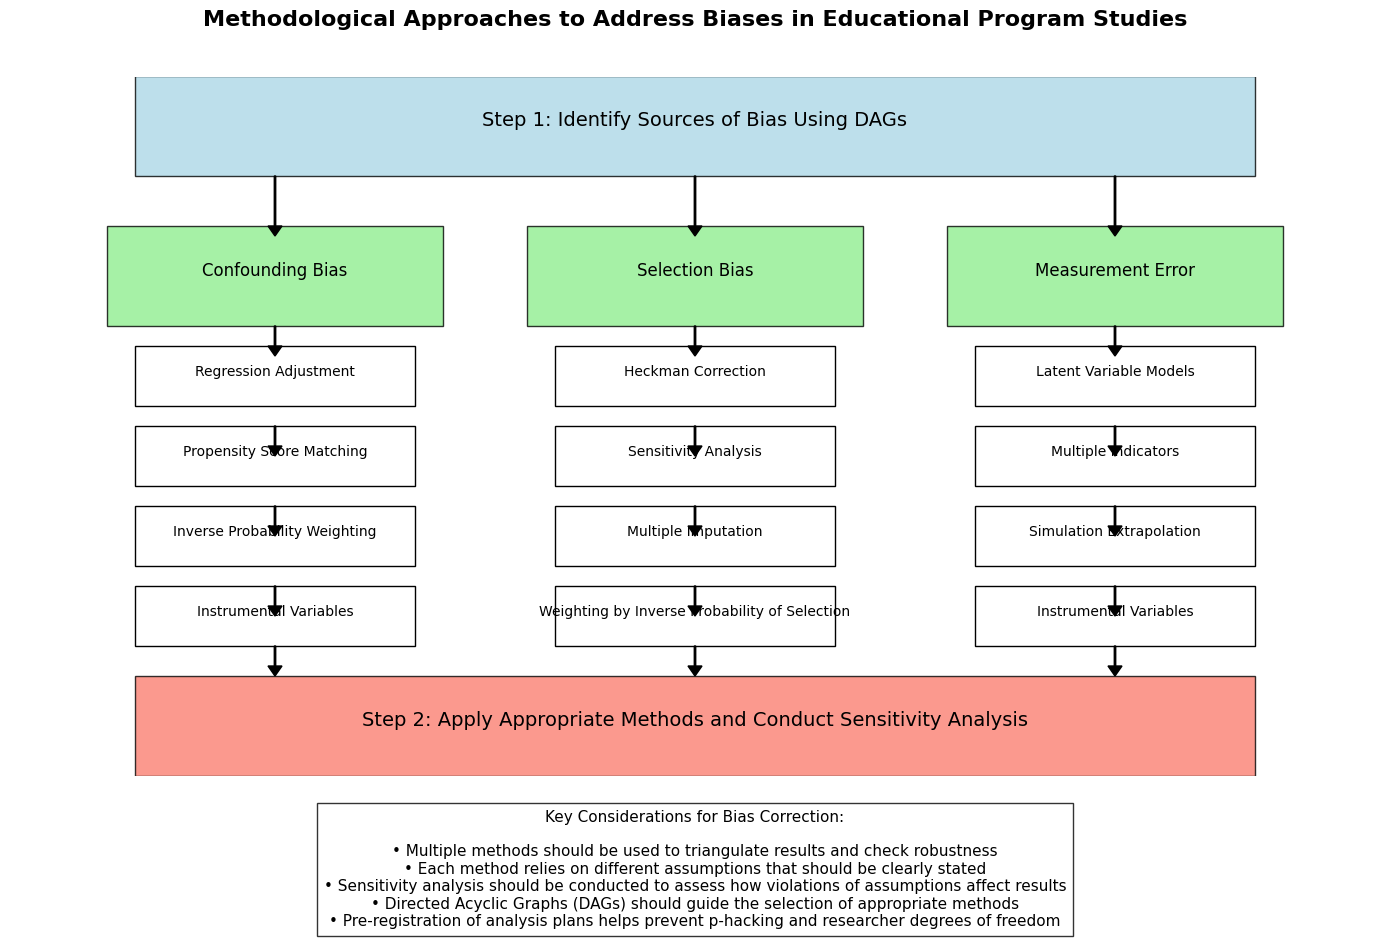

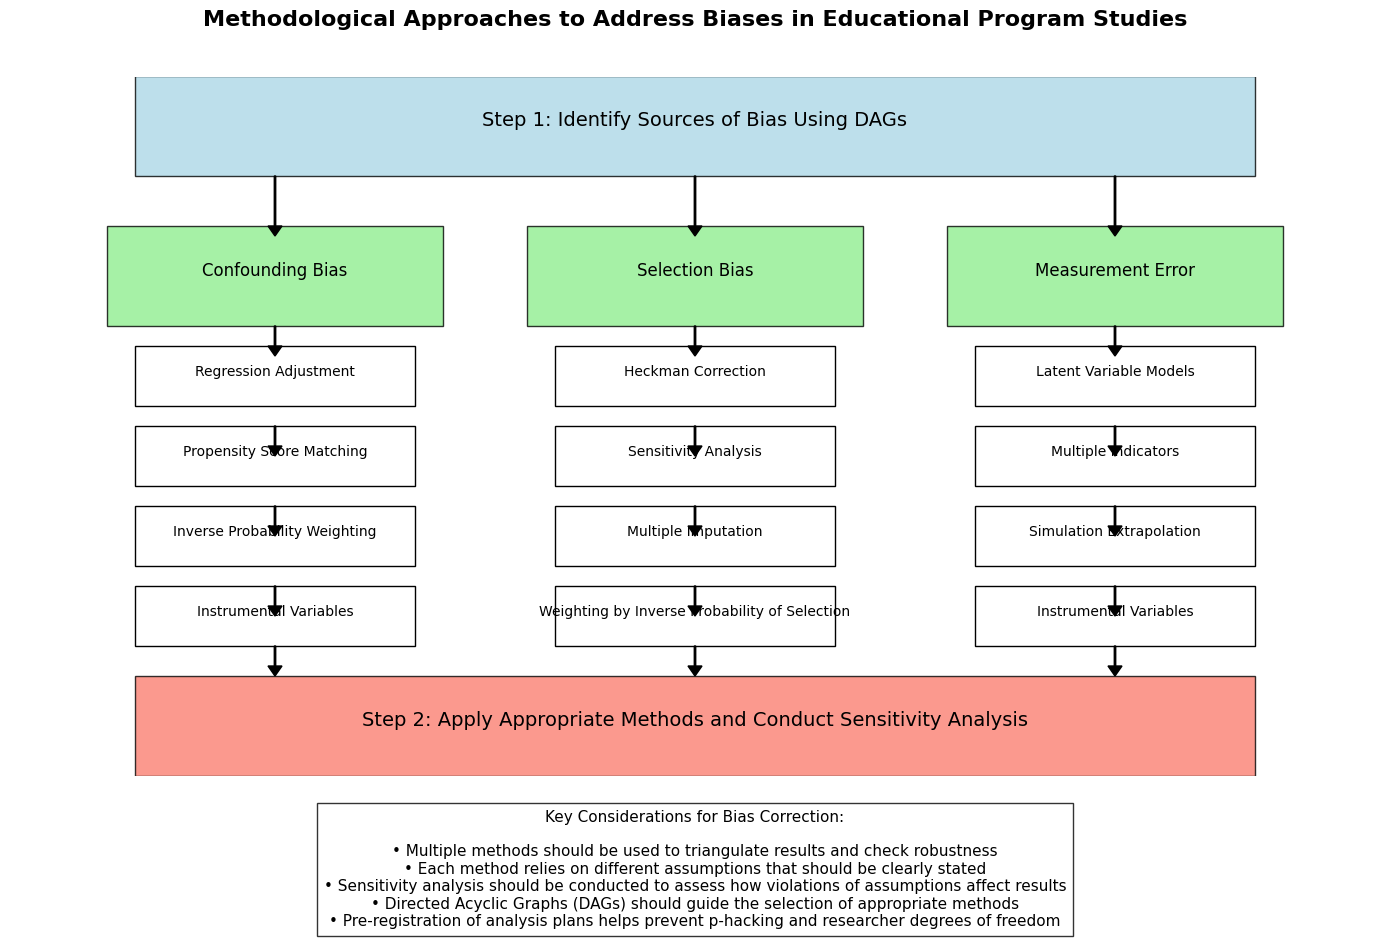

In [1]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

def create_educational_program_dag():
    """
    Creates a DAG for educational program effect on academic performance
    """
    # Create directed graph
    G = nx.DiGraph()

    # Define nodes
    nodes = [
        "Educational\nProgram (P)",
        "Socioeconomic\nStatus (SES)",
        "Prior Academic\nAchievement (PAA)",
        "Student\nMotivation (M)",
        "Study Time (ST)",
        "Peer Effects (PE)",
        "Academic\nPerformance (AP)",
        "School\nResources (SR)",
        "Teacher\nQuality (TQ)"
    ]

    for node in nodes:
        G.add_node(node)

    # Define edges (causal relationships)
    edges = [
        ("Educational\nProgram (P)", "Student\nMotivation (M)"),
        ("Educational\nProgram (P)", "Study Time (ST)"),
        ("Educational\nProgram (P)", "Academic\nPerformance (AP)"),
        ("Student\nMotivation (M)", "Study Time (ST)"),
        ("Student\nMotivation (M)", "Academic\nPerformance (AP)"),
        ("Study Time (ST)", "Academic\nPerformance (AP)"),
        ("Socioeconomic\nStatus (SES)", "Prior Academic\nAchievement (PAA)"),
        ("Socioeconomic\nStatus (SES)", "Educational\nProgram (P)"),
        ("Prior Academic\nAchievement (PAA)", "Educational\nProgram (P)"),
        ("Prior Academic\nAchievement (PAA)", "Academic\nPerformance (AP)"),
        ("Prior Academic\nAchievement (PAA)", "Student\nMotivation (M)"),
        ("Peer Effects (PE)", "Student\nMotivation (M)"),
        ("Peer Effects (PE)", "Academic\nPerformance (AP)"),
        ("School\nResources (SR)", "Educational\nProgram (P)"),
        ("School\nResources (SR)", "Academic\nPerformance (AP)"),
        ("School\nResources (SR)", "Teacher\nQuality (TQ)"),
        ("Teacher\nQuality (TQ)", "Academic\nPerformance (AP)")
    ]

    G.add_edges_from(edges)

    # Create the figure
    plt.figure(figsize=(14, 10))

    # Define node positions
    pos = {
        "Educational\nProgram (P)": (3, 2),
        "Socioeconomic\nStatus (SES)": (0, 3),
        "Prior Academic\nAchievement (PAA)": (1.5, 3),
        "Student\nMotivation (M)": (3, 1),
        "Study Time (ST)": (4.5, 1),
        "Peer Effects (PE)": (1.5, 1),
        "Academic\nPerformance (AP)": (3, 0),
        "School\nResources (SR)": (5, 3),
        "Teacher\nQuality (TQ)": (5, 1.5)
    }

    # Node types (for coloring)
    node_types = {
        "Educational\nProgram (P)": "treatment",
        "Socioeconomic\nStatus (SES)": "confounder",
        "Prior Academic\nAchievement (PAA)": "confounder",
        "Student\nMotivation (M)": "mediator",
        "Study Time (ST)": "mediator",
        "Peer Effects (PE)": "confounder",
        "Academic\nPerformance (AP)": "outcome",
        "School\nResources (SR)": "confounder",
        "Teacher\nQuality (TQ)": "confounder"
    }

    # Color mapping
    color_map = {
        "treatment": "lightgreen",
        "confounder": "lightblue",
        "mediator": "lightyellow",
        "outcome": "salmon",
        "collider": "lightgray"
    }

    # Assign colors to nodes
    node_colors = [color_map[node_types[node]] for node in G.nodes()]

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=3500,
            font_size=10, font_weight='bold', arrowsize=20,
            connectionstyle='arc3,rad=0.1', edgecolors='black', linewidths=2)

    # Add title
    plt.title("Directed Acyclic Graph (DAG) for Educational Program Study", fontsize=16)

    # Add legend
    legend_elements = [
        Patch(facecolor='lightgreen', edgecolor='black', label='Treatment (Program)'),
        Patch(facecolor='lightblue', edgecolor='black', label='Confounders'),
        Patch(facecolor='lightyellow', edgecolor='black', label='Mediators'),
        Patch(facecolor='salmon', edgecolor='black', label='Outcome (Academic Performance)')
    ]

    plt.legend(handles=legend_elements, loc='upper right')

    # Add explanatory text
    explanation_text = (
        "Variables to Adjust For in Analysis:\n"
        "• Confounders to control: SES, PAA, PE, SR, TQ (these affect both program assignment and outcome)\n"
        "• Mediators (M, ST): Don't control if interested in total effect; control if interested in direct effect\n"
        "• Methods: Propensity score matching, regression adjustment, instrumental variables, or structural equation modeling"
    )

    plt.figtext(0.5, 0.01, explanation_text, ha="center", fontsize=12,
                bbox={"facecolor":"white", "alpha":0.8, "pad":5})

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)

    # Save the figure
    plt.savefig('educational_program_dag.png', dpi=300)
    plt.show()

    return plt.gcf()

# Second visualization: Bias amplification through collider conditioning
def create_collider_bias_example():
    """
    Creates a visualization showing how collider bias can affect educational studies
    """
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Collider Bias in Educational Program Studies', fontsize=16)

    # Example 1: True causal structure
    G1 = nx.DiGraph()
    G1.add_nodes_from(["Program", "Performance", "Motivation"])
    G1.add_edges_from([("Program", "Motivation"), ("Program", "Performance"),
                      ("Motivation", "Performance")])

    pos1 = {"Program": (0, 0), "Motivation": (1, 0), "Performance": (2, 0)}

    # Node colors
    node_colors1 = ["lightgreen", "lightyellow", "salmon"]

    # Draw the graph
    nx.draw(G1, pos1, ax=axs[0], with_labels=True, node_color=node_colors1,
            node_size=2000, font_size=10, font_weight='bold', arrowsize=20)

    axs[0].set_title("True Causal Structure\n(Program affects Performance directly\nand through Motivation)")

    # Example 2: Selection on high-performing students
    G2 = nx.DiGraph()
    G2.add_nodes_from(["Program", "Performance", "Motivation", "Selected"])
    G2.add_edges_from([("Program", "Motivation"), ("Program", "Performance"),
                      ("Motivation", "Performance"), ("Performance", "Selected")])

    pos2 = {"Program": (0, 0), "Motivation": (1, 0), "Performance": (2, 0), "Selected": (3, 0)}

    # Node colors
    node_colors2 = ["lightgreen", "lightyellow", "salmon", "lightgray"]

    # Draw the graph
    nx.draw(G2, pos2, ax=axs[1], with_labels=True, node_color=node_colors2,
            node_size=2000, font_size=10, font_weight='bold', arrowsize=20)

    # Add dashed box around "Selected" to indicate conditioning
    box = plt.Rectangle((pos2["Selected"][0]-0.3, pos2["Selected"][1]-0.3),
                       0.6, 0.6, fill=False, edgecolor='red', linestyle='--',
                       transform=axs[1].transData)
    axs[1].add_patch(box)

    axs[1].set_title("Selection Bias: Analyzing Only High Performers\n(Conditioning on a collider creates\nspurious association)")

    # Example 3: Adjusting for post-treatment variable
    G3 = nx.DiGraph()
    G3.add_nodes_from(["Program", "Performance", "Motivation"])
    G3.add_edges_from([("Program", "Motivation"), ("Program", "Performance"),
                      ("Motivation", "Performance")])

    pos3 = {"Program": (0, 0), "Motivation": (1, 0), "Performance": (2, 0)}

    # Node colors - highlighting Motivation in red to indicate problematic adjustment
    node_colors3 = ["lightgreen", "red", "salmon"]

    # Draw the graph
    nx.draw(G3, pos3, ax=axs[2], with_labels=True, node_color=node_colors3,
            node_size=2000, font_size=10, font_weight='bold', arrowsize=20)

    # Add dashed box around "Motivation" to indicate conditioning
    box2 = plt.Rectangle((pos3["Motivation"][0]-0.3, pos3["Motivation"][1]-0.3),
                        0.6, 0.6, fill=False, edgecolor='red', linestyle='--',
                        transform=axs[2].transData)
    axs[2].add_patch(box2)

    axs[2].set_title("Post-treatment Adjustment Bias\n(Controlling for motivation blocks\nthe indirect causal pathway)")

    # Add explanation
    explanation_text = (
        "Common Biases in Educational Studies:\n\n"
        "1. Collider Bias: Occurs when selecting or controlling for a variable affected by both treatment and outcome (or their causes)\n"
        "2. Post-treatment Adjustment Bias: Controlling for mediators blocks indirect causal effects, underestimating total effect\n"
        "3. Selection Bias: Analyzing only a subset of students based on criteria affected by the program can distort results"
    )

    plt.figtext(0.5, 0.01, explanation_text, ha="center", fontsize=12,
                bbox={"facecolor":"white", "alpha":0.8, "pad":5})

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    # Save the figure
    plt.savefig('educational_collider_bias.png', dpi=300)
    plt.show()

    return fig

# Third visualization: Correction methods for addressing identified biases
def visualize_bias_correction_methods():
    """
    Creates a flowchart of bias correction methods for educational program studies
    """
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.axis('off')

    # Title
    plt.text(0.5, 0.95, 'Methodological Approaches to Address Biases in Educational Program Studies',
             horizontalalignment='center', fontsize=16, fontweight='bold', transform=fig.transFigure)

    # Create boxes
    # Step 1: Identify bias source
    step1_box = plt.Rectangle((0.1, 0.8), 0.8, 0.1, facecolor='lightblue',
                              edgecolor='black', alpha=0.8, transform=fig.transFigure)
    ax.add_patch(step1_box)
    plt.text(0.5, 0.85, 'Step 1: Identify Sources of Bias Using DAGs',
             horizontalalignment='center', fontsize=14, transform=fig.transFigure)

    # Create three main method boxes
    method_titles = [
        "Confounding Bias",
        "Selection Bias",
        "Measurement Error"
    ]

    method_y = 0.7
    method_boxes = []
    for i, title in enumerate(method_titles):
        x_pos = 0.2 + i * 0.3
        box = plt.Rectangle((x_pos - 0.12, method_y - 0.05), 0.24, 0.1,
                           facecolor='lightgreen', edgecolor='black', alpha=0.8,
                           transform=fig.transFigure)
        ax.add_patch(box)
        plt.text(x_pos, method_y, title, horizontalalignment='center',
                fontsize=12, transform=fig.transFigure)

        # Add arrow from Step 1
        arrow = plt.arrow(x_pos, 0.8, 0, -0.05, head_width=0.01, head_length=0.01,
                         fc='black', ec='black', transform=fig.transFigure)
        method_boxes.append(box)

    # Correction methods for each bias type
    correction_methods = [
        [
            "Regression Adjustment",
            "Propensity Score Matching",
            "Inverse Probability Weighting",
            "Instrumental Variables"
        ],
        [
            "Heckman Correction",
            "Sensitivity Analysis",
            "Multiple Imputation",
            "Weighting by Inverse Probability of Selection"
        ],
        [
            "Latent Variable Models",
            "Multiple Indicators",
            "Simulation Extrapolation",
            "Instrumental Variables"
        ]
    ]

    # Add correction methods
    for i, methods in enumerate(correction_methods):
        x_pos = 0.2 + i * 0.3

        for j, method in enumerate(methods):
            y_pos = method_y - 0.1 - j * 0.08

            # Add method box
            method_box = plt.Rectangle((x_pos - 0.1, y_pos - 0.03), 0.2, 0.06,
                                      facecolor='white', edgecolor='black',
                                      transform=fig.transFigure)
            ax.add_patch(method_box)

            # Add method text
            plt.text(x_pos, y_pos, method, horizontalalignment='center',
                    fontsize=10, transform=fig.transFigure)

            # Add arrow from bias type to method
            if j == 0:
                arrow = plt.arrow(x_pos, method_y - 0.05, 0, -0.02,
                                 head_width=0.01, head_length=0.01,
                                 fc='black', ec='black', transform=fig.transFigure)
            else:
                arrow = plt.arrow(x_pos, y_pos + 0.03, 0, -0.02,
                                 head_width=0.01, head_length=0.01,
                                 fc='black', ec='black', transform=fig.transFigure)

    # Add final recommendation box
    final_box = plt.Rectangle((0.1, 0.2), 0.8, 0.1, facecolor='salmon',
                             edgecolor='black', alpha=0.8, transform=fig.transFigure)
    ax.add_patch(final_box)
    plt.text(0.5, 0.25, 'Step 2: Apply Appropriate Methods and Conduct Sensitivity Analysis',
             horizontalalignment='center', fontsize=14, transform=fig.transFigure)

    # Add arrows to final box
    for i in range(3):
        x_pos = 0.2 + i * 0.3
        y_pos = method_y - 0.1 - 3 * 0.08

        arrow = plt.arrow(x_pos, y_pos - 0.03, 0, -0.02, head_width=0.01, head_length=0.01,
                         fc='black', ec='black', transform=fig.transFigure)

    # Add notes at bottom
    notes_text = (
        "Key Considerations for Bias Correction:\n\n"
        "• Multiple methods should be used to triangulate results and check robustness\n"
        "• Each method relies on different assumptions that should be clearly stated\n"
        "• Sensitivity analysis should be conducted to assess how violations of assumptions affect results\n"
        "• Directed Acyclic Graphs (DAGs) should guide the selection of appropriate methods\n"
        "• Pre-registration of analysis plans helps prevent p-hacking and researcher degrees of freedom"
    )

    plt.figtext(0.5, 0.05, notes_text, ha="center", fontsize=11,
                bbox={"facecolor":"white", "alpha":0.8, "pad":5})

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    # Save the figure
    plt.savefig('bias_correction_methods.png', dpi=300)
    plt.show()

    return fig

# Run all the visualizations
print("Generating Educational Program DAG...")
create_educational_program_dag()

print("\nGenerating Collider Bias Example...")
create_collider_bias_example()

print("\nGenerating Bias Correction Methods Visualization...")
visualize_bias_correction_methods()

Generating Exercise-Weight Loss Causal Graph...


<ipython-input-2-d3eb1c9e74fb>:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


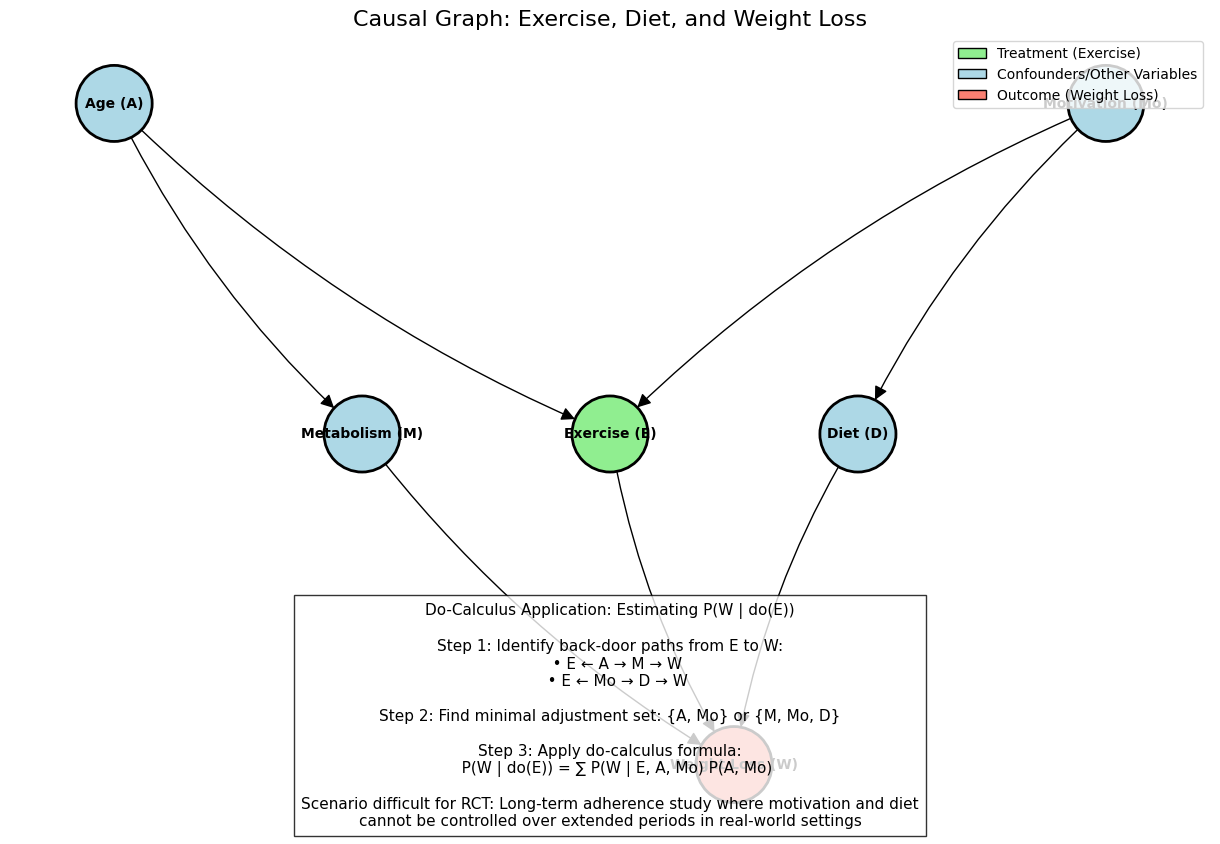


Generating Do-Calculus Steps Visualization...


<Figure size 640x480 with 0 Axes>

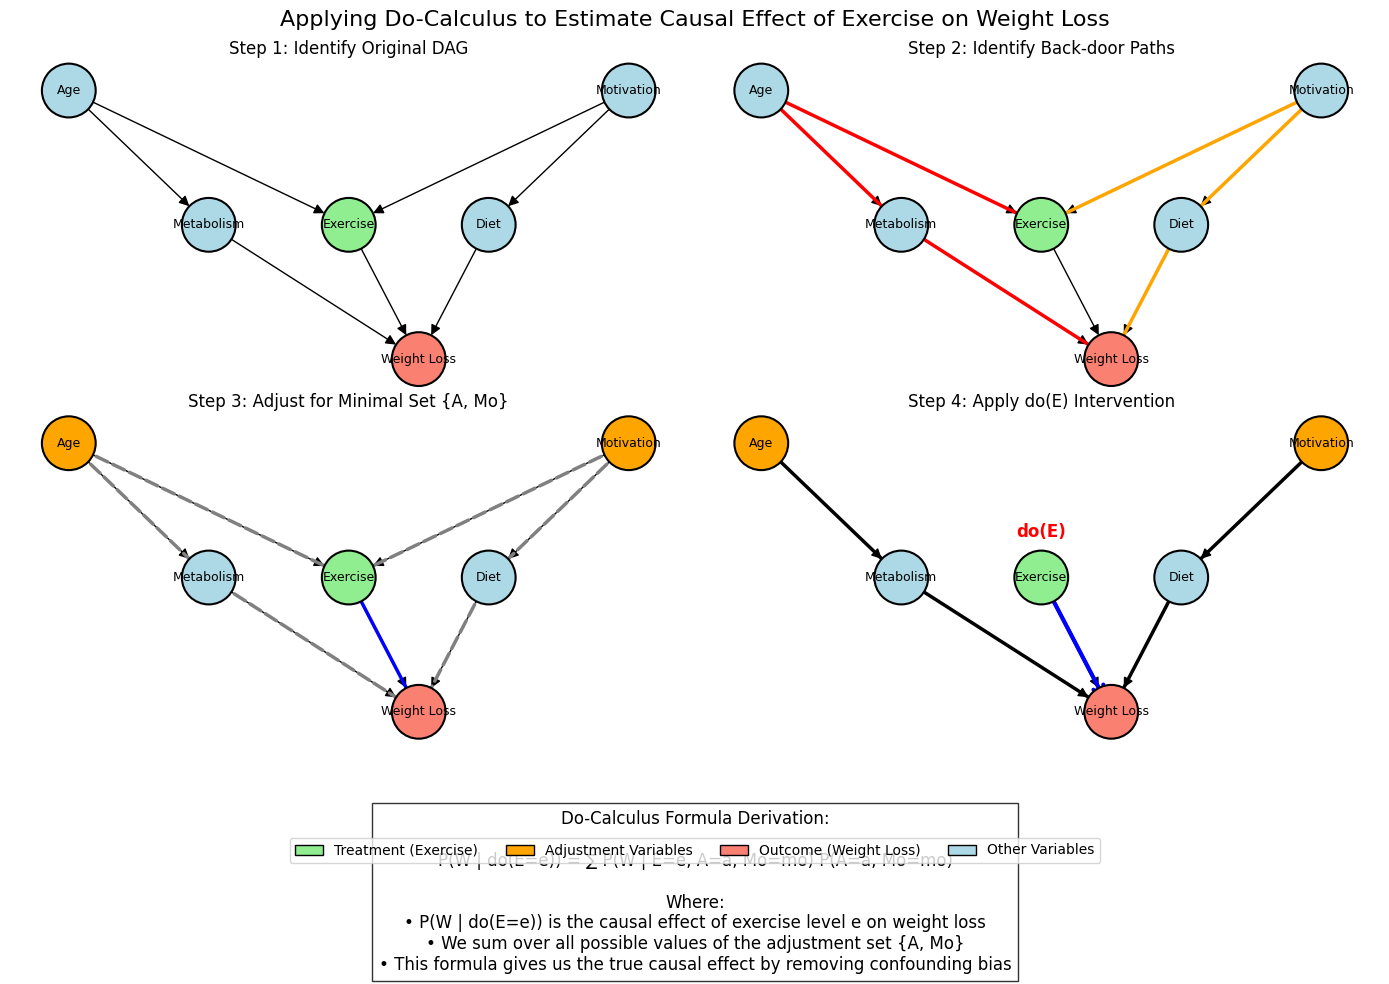


Generating RCT Difficulty Scenario...


ValueError: 'transform' is not allowed as a keyword argument; axvline generates its own transform.

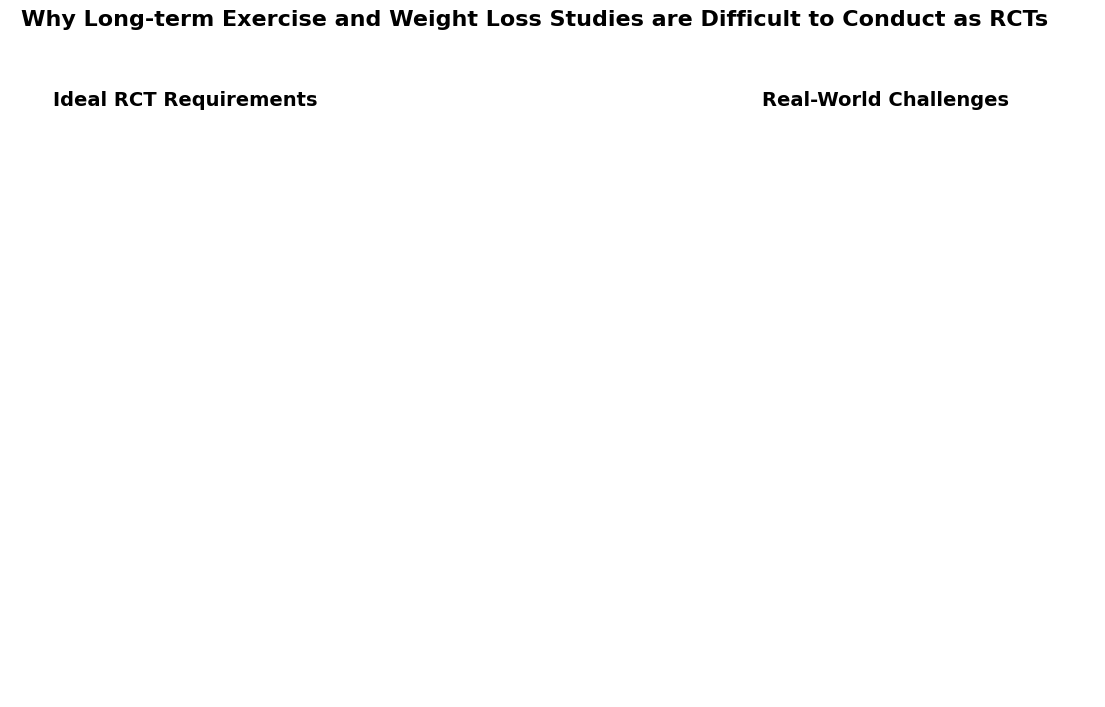

In [2]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

def create_exercise_weight_loss_dag():
    """
    Creates a causal graph for exercise and weight loss with do-calculus
    """
    # Create directed graph
    G = nx.DiGraph()

    # Define nodes
    nodes = [
        "Exercise (E)",
        "Diet (D)",
        "Weight Loss (W)",
        "Age (A)",
        "Metabolism (M)",
        "Motivation (Mo)"
    ]

    for node in nodes:
        G.add_node(node)

    # Define edges (causal relationships)
    edges = [
        ("Exercise (E)", "Weight Loss (W)"),
        ("Diet (D)", "Weight Loss (W)"),
        ("Age (A)", "Metabolism (M)"),
        ("Age (A)", "Exercise (E)"),
        ("Metabolism (M)", "Weight Loss (W)"),
        ("Motivation (Mo)", "Exercise (E)"),
        ("Motivation (Mo)", "Diet (D)")
    ]

    G.add_edges_from(edges)

    # Create the figure
    plt.figure(figsize=(12, 8))

    # Define node positions
    pos = {
        "Exercise (E)": (2, 1),
        "Diet (D)": (3, 1),
        "Weight Loss (W)": (2.5, 0),
        "Age (A)": (0, 2),
        "Metabolism (M)": (1, 1),
        "Motivation (Mo)": (4, 2)
    }

    # Node colors based on variable type
    node_colors = {
        "Exercise (E)": "lightgreen",
        "Diet (D)": "lightblue",
        "Weight Loss (W)": "salmon",
        "Age (A)": "lightblue",
        "Metabolism (M)": "lightblue",
        "Motivation (Mo)": "lightblue"
    }

    colors = [node_colors[node] for node in G.nodes()]

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=3000,
            font_size=10, font_weight='bold', arrowsize=20,
            connectionstyle='arc3,rad=0.1', edgecolors='black', linewidths=2)

    # Add title
    plt.title("Causal Graph: Exercise, Diet, and Weight Loss", fontsize=16)

    # Add legend
    legend_elements = [
        Patch(facecolor='lightgreen', edgecolor='black', label='Treatment (Exercise)'),
        Patch(facecolor='lightblue', edgecolor='black', label='Confounders/Other Variables'),
        Patch(facecolor='salmon', edgecolor='black', label='Outcome (Weight Loss)')
    ]

    plt.legend(handles=legend_elements, loc='upper right')

    # Add do-calculus explanation
    do_calculus_text = (
        "Do-Calculus Application: Estimating P(W | do(E))\n\n"
        "Step 1: Identify back-door paths from E to W:\n"
        "   • E ← A → M → W\n"
        "   • E ← Mo → D → W\n\n"
        "Step 2: Find minimal adjustment set: {A, Mo} or {M, Mo, D}\n\n"
        "Step 3: Apply do-calculus formula:\n"
        "   P(W | do(E)) = ∑ P(W | E, A, Mo) P(A, Mo)\n\n"
        "Scenario difficult for RCT: Long-term adherence study where motivation and diet\n"
        "cannot be controlled over extended periods in real-world settings"
    )

    plt.figtext(0.5, 0.01, do_calculus_text, ha="center", fontsize=11,
                bbox={"facecolor":"white", "alpha":0.8, "pad":5})

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25)

    # Save the figure
    plt.savefig('exercise_weight_loss_do_calculus.png', dpi=300)
    plt.show()

    return plt.gcf()

# Visualization 2: Do-calculus derivation steps
def visualize_do_calculus_steps():
    """
    Creates a visual explanation of do-calculus steps for the exercise-weight loss example
    """
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Applying Do-Calculus to Estimate Causal Effect of Exercise on Weight Loss', fontsize=16)

    # Common base graph structure and node positions
    def create_base_graph():
        G = nx.DiGraph()
        nodes = ["E", "D", "W", "A", "M", "Mo"]
        G.add_nodes_from(nodes)
        edges = [
            ("E", "W"), ("D", "W"), ("A", "M"), ("A", "E"),
            ("M", "W"), ("Mo", "E"), ("Mo", "D")
        ]
        G.add_edges_from(edges)
        return G

    pos = {
        "E": (2, 1),
        "D": (3, 1),
        "W": (2.5, 0),
        "A": (0, 2),
        "M": (1, 1),
        "Mo": (4, 2)
    }

    labels = {
        "E": "Exercise",
        "D": "Diet",
        "W": "Weight Loss",
        "A": "Age",
        "M": "Metabolism",
        "Mo": "Motivation"
    }

    # Step 1: Original graph
    G1 = create_base_graph()

    # Define node colors
    node_colors1 = {
        "E": "lightgreen",
        "D": "lightblue",
        "W": "salmon",
        "A": "lightblue",
        "M": "lightblue",
        "Mo": "lightblue"
    }

    colors1 = [node_colors1[node] for node in G1.nodes()]

    # Draw the graph
    nx.draw(G1, pos, ax=axs[0, 0], with_labels=False, node_color=colors1,
            node_size=1500, arrowsize=15, edgecolors='black', linewidths=1.5)

    # Add custom node labels
    for node, label in labels.items():
        axs[0, 0].text(pos[node][0], pos[node][1], label,
                      horizontalalignment='center', verticalalignment='center',
                      fontsize=9)

    axs[0, 0].set_title('Step 1: Identify Original DAG', fontsize=12)

    # Step 2: Identify back-door paths
    G2 = create_base_graph()

    # Define node colors - same as original
    colors2 = colors1.copy()

    # Draw the graph
    nx.draw(G2, pos, ax=axs[0, 1], with_labels=False, node_color=colors2,
            node_size=1500, arrowsize=15, edgecolors='black', linewidths=1.5)

    # Add custom node labels
    for node, label in labels.items():
        axs[0, 1].text(pos[node][0], pos[node][1], label,
                      horizontalalignment='center', verticalalignment='center',
                      fontsize=9)

    # Highlight back-door paths
    backdoor_path1 = [("E", "A"), ("A", "M"), ("M", "W")]  # Actually A->E and A->M->W
    backdoor_path2 = [("E", "Mo"), ("Mo", "D"), ("D", "W")]  # Actually Mo->E and Mo->D->W

    # We need to highlight the actual edges, converting the conceptual paths
    backdoor_edges1 = [("A", "E"), ("A", "M"), ("M", "W")]
    backdoor_edges2 = [("Mo", "E"), ("Mo", "D"), ("D", "W")]

    # Draw backdoor path 1 in red
    nx.draw_networkx_edges(G2, pos, ax=axs[0, 1], edgelist=backdoor_edges1,
                          width=2.5, edge_color='red', arrowstyle='->', arrowsize=15)

    # Draw backdoor path 2 in orange
    nx.draw_networkx_edges(G2, pos, ax=axs[0, 1], edgelist=backdoor_edges2,
                          width=2.5, edge_color='orange', arrowstyle='->', arrowsize=15)

    axs[0, 1].set_title('Step 2: Identify Back-door Paths', fontsize=12)

    # Step 3: Adjust for minimal set
    G3 = create_base_graph()

    # Define node colors - highlight adjustment variables
    node_colors3 = {
        "E": "lightgreen",
        "D": "lightblue",
        "W": "salmon",
        "A": "orange",  # Adjusted
        "M": "lightblue",
        "Mo": "orange"  # Adjusted
    }

    colors3 = [node_colors3[node] for node in G3.nodes()]

    # Draw the graph
    nx.draw(G3, pos, ax=axs[1, 0], with_labels=False, node_color=colors3,
            node_size=1500, arrowsize=15, edgecolors='black', linewidths=1.5)

    # Add custom node labels
    for node, label in labels.items():
        axs[1, 0].text(pos[node][0], pos[node][1], label,
                      horizontalalignment='center', verticalalignment='center',
                      fontsize=9)

    # Show backdoor paths as blocked
    backdoor_edges_blocked = backdoor_edges1 + backdoor_edges2
    nx.draw_networkx_edges(G3, pos, ax=axs[1, 0], edgelist=backdoor_edges_blocked,
                          width=2.5, edge_color='gray', style='dashed',
                          arrowstyle='->', arrowsize=15)

    # Show direct effect edge
    direct_edge = [("E", "W")]
    nx.draw_networkx_edges(G3, pos, ax=axs[1, 0], edgelist=direct_edge,
                          width=2.5, edge_color='blue', arrowstyle='->', arrowsize=15)

    axs[1, 0].set_title('Step 3: Adjust for Minimal Set {A, Mo}', fontsize=12)

    # Step 4: Apply do-calculus and intervention
    G4 = create_base_graph()

    # Remove incoming edges to E to represent do(E)
    G4.remove_edge("A", "E")
    G4.remove_edge("Mo", "E")

    # Define node colors - same as step 3
    colors4 = colors3.copy()

    # Draw the graph
    nx.draw(G4, pos, ax=axs[1, 1], with_labels=False, node_color=colors4,
            node_size=1500, arrowsize=15, edgecolors='black', linewidths=1.5)

    # Add custom node labels
    for node, label in labels.items():
        axs[1, 1].text(pos[node][0], pos[node][1], label,
                      horizontalalignment='center', verticalalignment='center',
                      fontsize=9)

    # Add "do(E)" label
    axs[1, 1].text(pos["E"][0], pos["E"][1] + 0.3, "do(E)",
                  horizontalalignment='center', color='red', fontsize=12, fontweight='bold')

    # Show direct effect and remaining edges
    remaining_edges = [("E", "W"), ("D", "W"), ("A", "M"), ("M", "W"), ("Mo", "D")]
    nx.draw_networkx_edges(G4, pos, ax=axs[1, 1], edgelist=remaining_edges,
                          width=2.5, arrowstyle='->', arrowsize=15)

    # Highlight the causal path
    causal_edge = [("E", "W")]
    nx.draw_networkx_edges(G4, pos, ax=axs[1, 1], edgelist=causal_edge,
                          width=3, edge_color='blue', arrowstyle='->', arrowsize=20)

    axs[1, 1].set_title('Step 4: Apply do(E) Intervention', fontsize=12)

    # Add explanation for do-calculus formula
    formula_text = (
        "Do-Calculus Formula Derivation:\n\n"
        "P(W | do(E=e)) = ∑ P(W | E=e, A=a, Mo=mo) P(A=a, Mo=mo)\n\n"
        "Where:\n"
        "• P(W | do(E=e)) is the causal effect of exercise level e on weight loss\n"
        "• We sum over all possible values of the adjustment set {A, Mo}\n"
        "• This formula gives us the true causal effect by removing confounding bias"
    )

    plt.figtext(0.5, 0.02, formula_text, ha="center", fontsize=12,
                bbox={"facecolor":"white", "alpha":0.8, "pad":5})

    # Add legend
    legend_elements = [
        Patch(facecolor='lightgreen', edgecolor='black', label='Treatment (Exercise)'),
        Patch(facecolor='orange', edgecolor='black', label='Adjustment Variables'),
        Patch(facecolor='salmon', edgecolor='black', label='Outcome (Weight Loss)'),
        Patch(facecolor='lightblue', edgecolor='black', label='Other Variables')
    ]

    fig.legend(handles=legend_elements, loc='lower center', ncol=4, bbox_to_anchor=(0.5, 0.12))

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25)

    # Save the figure
    plt.savefig('do_calculus_steps.png', dpi=300)
    plt.show()

    return fig

# Visualization 3: RCT Difficulty Scenario
def visualize_rct_difficulty():
    """
    Creates a visualization explaining why an RCT would be difficult for this scenario
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.axis('off')

    # Title
    plt.text(0.5, 0.95, 'Why Long-term Exercise and Weight Loss Studies are Difficult to Conduct as RCTs',
             horizontalalignment='center', fontsize=16, fontweight='bold', transform=fig.transFigure)

    # Create comparison table
    # Headers
    plt.text(0.25, 0.85, 'Ideal RCT Requirements',
             horizontalalignment='center', fontsize=14, fontweight='bold', transform=fig.transFigure)
    plt.text(0.75, 0.85, 'Real-World Challenges',
             horizontalalignment='center', fontsize=14, fontweight='bold', transform=fig.transFigure)

    # Divider line
    ax.axvline(x=0.5, ymin=0.2, ymax=0.8, color='black', alpha=0.3, transform=fig.transFigure)

    # Horizontal lines
    y_positions = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3]
    for y in y_positions:
        ax.axhline(y=y, xmin=0.1, xmax=0.9, color='black', alpha=0.3, transform=fig.transFigure)

    # Row 1: Randomization
    plt.text(0.25, 0.75, 'Random assignment to exercise groups',
             horizontalalignment='center', fontsize=12, transform=fig.transFigure)
    plt.text(0.75, 0.75, 'Self-selection based on motivation and ability\nEthical issues with assigning sedentary lifestyle',
             horizontalalignment='center', fontsize=12, transform=fig.transFigure)

    # Row 2: Compliance
    plt.text(0.25, 0.65, 'Perfect adherence to exercise protocol',
             horizontalalignment='center', fontsize=12, transform=fig.transFigure)
    plt.text(0.75, 0.65, 'Variable compliance and dropout\nMotivation affects both exercise and diet',
             horizontalalignment='center', fontsize=12, transform=fig.transFigure)

    # Row 3: Diet Control
    plt.text(0.25, 0.55, 'Standardized diet across all participants',
             horizontalalignment='center', fontsize=12, transform=fig.transFigure)
    plt.text(0.75, 0.55, 'Cannot fully control diet in free-living conditions\nExercise may influence dietary choices',
             horizontalalignment='center', fontsize=12, transform=fig.transFigure)

    # Row 4: Follow-up Period
    plt.text(0.25, 0.45, 'Long-term follow-up with complete data',
             horizontalalignment='center', fontsize=12, transform=fig.transFigure)
    plt.text(0.75, 0.45, 'High attrition rates over long periods\nSelective dropout creates bias',
             horizontalalignment='center', fontsize=12, transform=fig.transFigure)

    # Row 5: Blinding
    plt.text(0.25, 0.35, 'Blinding of participants and researchers',
             horizontalalignment='center', fontsize=12, transform=fig.transFigure)
    plt.text(0.75, 0.35, 'Impossible to blind participants to exercise\nExpectation effects influence outcomes',
             horizontalalignment='center', fontsize=12, transform=fig.transFigure)

    # Row 6: Measurement
    plt.text(0.25, 0.25, 'Accurate measurement of all variables',
             horizontalalignment='center', fontsize=12, transform=fig.transFigure)
    plt.text(0.75, 0.25, 'Self-reporting bias for diet and exercise\nVariation in metabolic response to exercise',
             horizontalalignment='center', fontsize=12, transform=fig.transFigure)

    # Add explanation
    explanation_text = (
        "Do-Calculus as an Alternative Approach:\n\n"
        "When RCTs are impractical, observational data combined with causal inference methods like do-calculus can help estimate\n"
        "causal effects. By identifying confounders through DAGs and properly adjusting for them, researchers can approximate\n"
        "the causal effect of exercise on weight loss despite the challenges of conducting a rigorous long-term RCT."
    )

    plt.figtext(0.5, 0.08, explanation_text, ha="center", fontsize=12,
                bbox={"facecolor":"lightblue", "alpha":0.2, "pad":5})

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    # Save the figure
    plt.savefig('rct_difficulty_scenario.png', dpi=300)
    plt.show()

    return fig

# Run all visualizations
print("Generating Exercise-Weight Loss Causal Graph...")
create_exercise_weight_loss_dag()

print("\nGenerating Do-Calculus Steps Visualization...")
visualize_do_calculus_steps()

print("\nGenerating RCT Difficulty Scenario...")
visualize_rct_difficulty()